In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, TimeSeriesSplit
import plot_constants as plconst

plconst.set_plot_parameters()

## Create CV Plots to Include in the Report

In [3]:
# Generate sample data
X = np.arange(101)

# Define the number of folds for cross-validation
k = 5

# Create a KFold object
kf = KFold(n_splits=k)
ts = TimeSeriesSplit(n_splits=k)

In [10]:
def plot_validation_split(splitter, title, file=None):
# Initialize the figure
    fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

    yticks = []

    # Perform k-fold cross-validation and plot each fold
    for i, (train_idx, val_idx) in enumerate(splitter.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = [i]*len(X_train), [i]*len(X_val)

        axes.plot(X_train, y_train, label='Training Data', color=plconst.uzh_colors["blue"], lw=3)
        axes.plot(X_val, y_val, label='Validation Data', color=plconst.uzh_colors["red"], lw=3)

        yticks.append(i)
        axes.legend(loc='upper right')

    # Customize the x-axis label
    axes.set_xlabel('Sample index')
    axes.set_ylabel("CV iteration")
    plt.title(title)

    # Set y lim ticks, limits and direction
    plt.ylim(-1, i+0.5)
    plt.yticks(yticks, fontsize = 22)
    plt.gca().invert_yaxis()

    # Dont repeat legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    legend = plt.legend(by_label.values(), by_label.keys(), loc="upper right", frameon=True, facecolor='white', framealpha=1, fontsize=14)
    legend.get_frame().set_linewidth(0) 
    # leg = axes.legend(frameon=True,facecolor='white', framealpha=1, fontsize=16)
    # frame = leg.get_frame()
    # frame.set_linewidth(0)
    
    # Save the plot to file
    if file is not None:
        plt.savefig(file, bbox_inches = 'tight')

    # Adjust spacing between subplots
    plt.tight_layout()
    # Show plot
    plt.show()

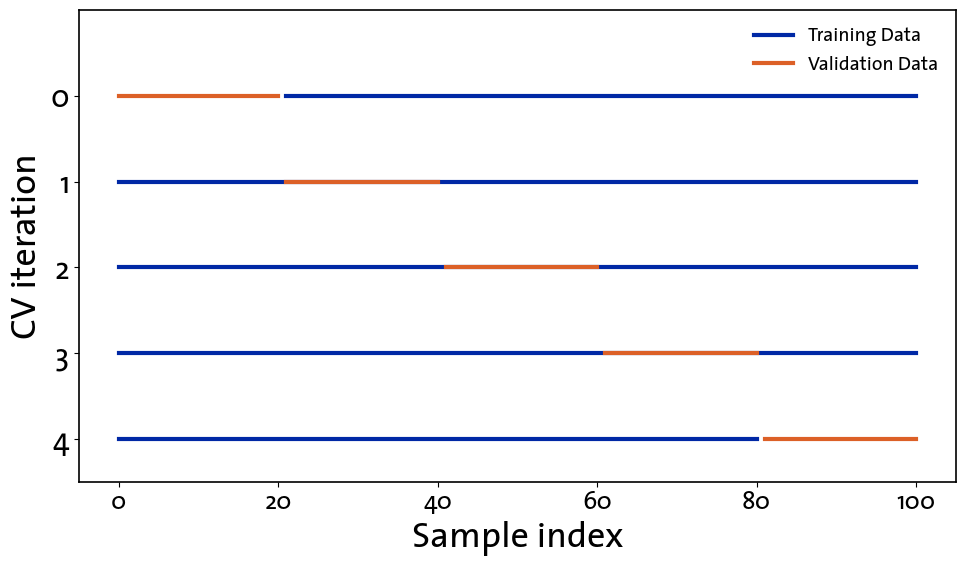

In [11]:
plot_validation_split(kf, "", "../../Results/Theory/K_fold_CV.png")


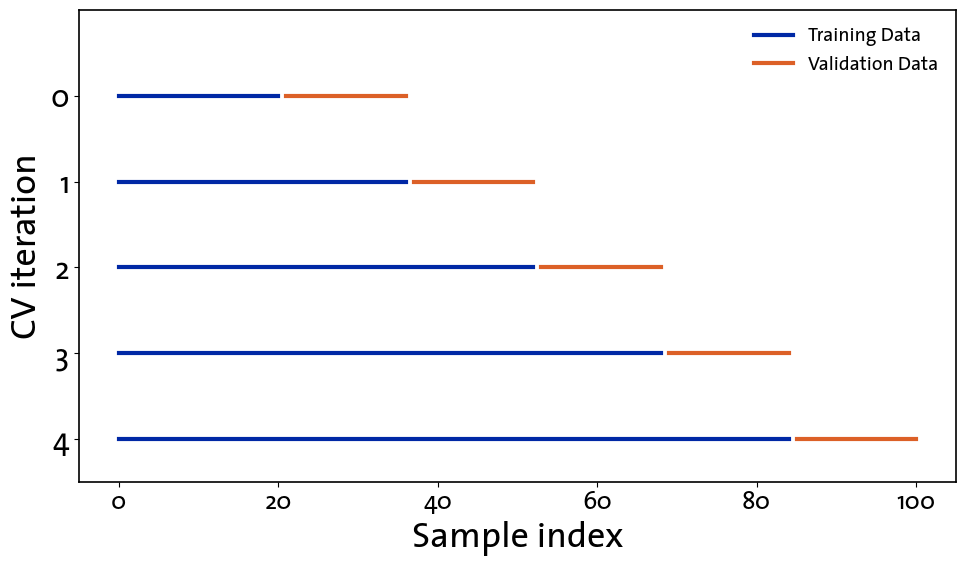

In [12]:
plot_validation_split(ts, "", "../../Results/Theory/Time_series_CV.png")


### Create Training Validation Loss Ideal

In [83]:
from scipy.interpolate import interp1d
import math

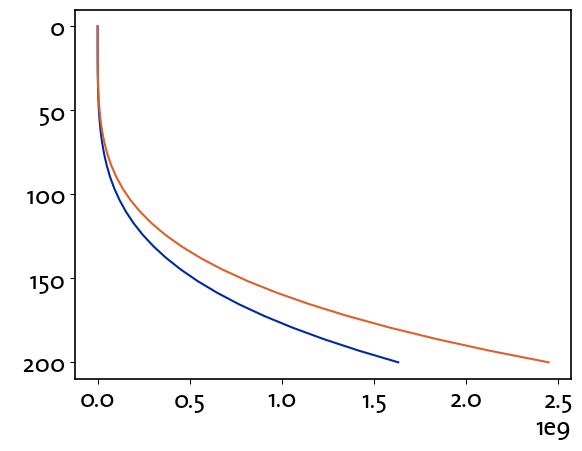

In [79]:
y = np.linspace(-200, 0, 30)
x = (1-y)**4 
x2 = x*1.5
# ind = 6
# y[ind:]
# x, y = x[:ind], y[:ind]

# x2 = np.linspace(-2, 2, 400)
# y2 = (x2*0.75)**2
# y2 = (x2*0.75)**2
thr = 30
x, y, x2 = x[:thr], y[:thr], x2[:thr]
plt.plot(x, y)
plt.plot(x2, y)

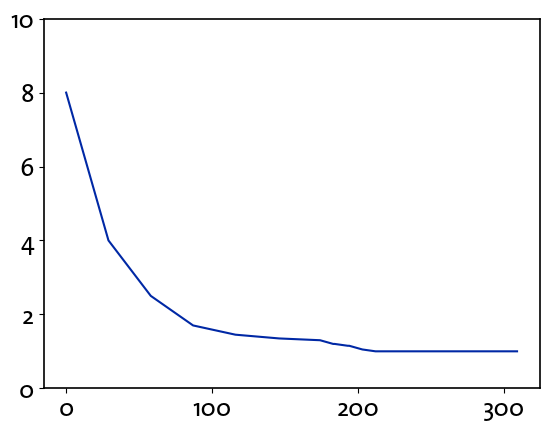

In [155]:
x = np.linspace(1, 20, 40)
y = [8, 7.3, 5.5, 5, 5.24, 5.13, 5.05, 4.95, 4.87, 4.6] 
y= np.concatenate((np.array(y), np.repeat(1, 20)))

y = [8, 4,2.5 , 1.77,  1.72, 1.65, 1.63, 1.60, 1.57, 1.5, 1.32, 1.24, 1.15, 1, 1 ,1, 1, 1, 1, 0.99, 0.98, 0.98, 0.97, 0.97, 0.96,1, 1,1 ]
# plt.plot(range(len(y)), y)
plt.ylim(0, 10)
# plt.plot(x, y)

y = [8, 4, 2.5, 1.7, 1.45, 1.35, 1.30, 1.20, 1.15, 1.05, 1,   1 ,1, 1,1 ,1, 1, 1, 1, 1, 1]

res = np.array([])
for i in range(1, len(y)):
    num = 30
    if i > 6: num = 10
    res = np.concatenate((res, np.linspace(y[i-1], y[i], num)))

n = 30
res = [res[i] for i in range(len(res)) if (i + 1) % n != 0]


plt.plot(range(len(res)), res)


In [149]:
print(res)

[8.         7.86206897 7.72413793 7.5862069  7.44827586 7.31034483
 7.17241379 7.03448276 6.89655172 6.75862069 6.62068966 6.48275862
 6.34482759 6.20689655 6.06896552 5.93103448 5.79310345 5.65517241
 5.51724138 5.37931034 5.24137931 5.10344828 4.96551724 4.82758621
 4.68965517 4.55172414 4.4137931  4.27586207 4.13793103 4.
 4.         3.94827586 3.89655172 3.84482759 3.79310345 3.74137931
 3.68965517 3.63793103 3.5862069  3.53448276 3.48275862 3.43103448
 3.37931034 3.32758621 3.27586207 3.22413793 3.17241379 3.12068966
 3.06896552 3.01724138 2.96551724 2.9137931  2.86206897 2.81034483
 2.75862069 2.70689655 2.65517241 2.60344828 2.55172414 2.5
 2.5        2.47241379 2.44482759 2.41724138 2.38965517 2.36206897
 2.33448276 2.30689655 2.27931034 2.25172414 2.22413793 2.19655172
 2.16896552 2.14137931 2.1137931  2.0862069  2.05862069 2.03103448
 2.00344828 1.97586207 1.94827586 1.92068966 1.89310345 1.86551724
 1.83793103 1.81034483 1.78275862 1.75517241 1.72758621 1.7
 1.7        1.691